In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv("dataset/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [570]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
cop=df.copy()

In [5]:
cop=df.copy()
def split_fnc(x):
    listt=x.split(" ")[:-1]
    string="".join(listt)
    for char in "/",".",",":
        string=string.replace(char,"")
    return string if string!="" else np.nan

In [6]:
cop["sub-Ticket"]=cop["Ticket"].apply(split_fnc)

In [7]:
def split_cabin(x):
    if x is np.nan:
        return
    listx=x.split(" ")
    for el in listx:
        if len(listx)==1:
            break
        if len(el)==1:
            listx.pop(listx.index(el))
    return listx[0][0]

In [8]:
def count_cabin(x):
    if x is np.nan:
        return
    listx=x.split(" ")
    for el in listx:
        if len(listx)==1:
            break
        if len(el)==1:
            listx.pop(listx.index(el))
    return len(listx)

In [9]:
cop["sub-Cabin"]=cop["Cabin"].apply(split_cabin)

In [10]:
cop["Cabin"]=cop["Cabin"].apply(count_cabin)

In [11]:
cop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sub-Ticket,sub-Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A5,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0,C,PC,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO2,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0,S,NaN,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1.0,S,NaN,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,WC,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1.0,C,NaN,C


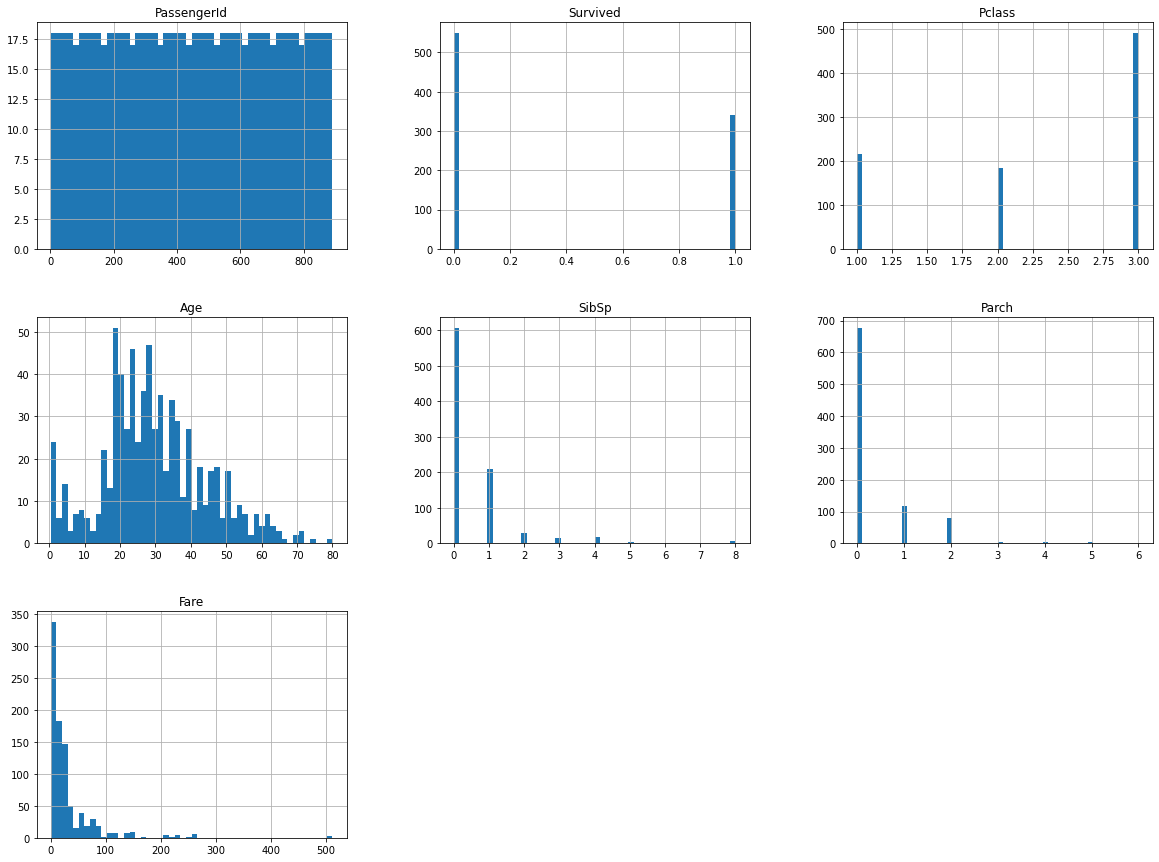

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
df.pop("PassengerId")

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [15]:
labels=df["Survived"].copy()

In [16]:
labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Fill the Nones in Age column**

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df[["Age"]])
imputer.statistics_

array([28.])

In [18]:
X=imputer.transform(df[["Age"]])

In [19]:
X

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [20]:
df.Age=X

**Remove first names in Name column**

In [21]:
df_names=df[["Name"]]

In [22]:
df_names=df_names.apply(lambda element: element.Name.split(",")[0],axis=1)

In [23]:
df.Name=df_names

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,Graham,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,Johnston,female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,Behr,male,26.0,0,0,111369,30.0000,C148,C


In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveFirstNameTrans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        for el in X[:,2]:
            el=el.split(",")[0]
        return X
trans=RemoveFirstNameTrans()
trans.transform(df.values)

array([[0, 3, 'Braund', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings', ..., 71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston', ..., 23.45, nan, 'S'],
       [1, 1, 'Behr', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley', ..., 7.75, nan, 'Q']], dtype=object)

In [26]:
copy=df.copy()
vv=copy.values[:,3]

In [44]:
vv

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

**One hot encoder**

In [28]:
from sklearn.preprocessing import OneHotEncoder
hot_incoder=OneHotEncoder()
df_temp=df[["Name","Embarked"]]
df_oneHot=hot_incoder.fit_transform(df_temp)

In [29]:
df_oneHot=pd.DataFrame(df_oneHot)

In [30]:
print(df_oneHot)

                                    0
0       (0, 73)\t1.0\n  (0, 669)\t1.0
1      (0, 136)\t1.0\n  (0, 667)\t1.0
2      (0, 251)\t1.0\n  (0, 669)\t1.0
3      (0, 198)\t1.0\n  (0, 669)\t1.0
4       (0, 11)\t1.0\n  (0, 669)\t1.0
..                                ...
886    (0, 406)\t1.0\n  (0, 669)\t1.0
887    (0, 221)\t1.0\n  (0, 669)\t1.0
888    (0, 293)\t1.0\n  (0, 669)\t1.0
889     (0, 52)\t1.0\n  (0, 667)\t1.0
890    (0, 159)\t1.0\n  (0, 668)\t1.0

[891 rows x 1 columns]


In [31]:
np.c_[df,df.values[:,5]+df.values[:,6]]

array([[0, 3, 'Braund', ..., nan, 'S', 1],
       [1, 1, 'Cumings', ..., 'C85', 'C', 1],
       [1, 3, 'Heikkinen', ..., nan, 'S', 0],
       ...,
       [0, 3, 'Johnston', ..., nan, 'S', 3],
       [1, 1, 'Behr', ..., 'C148', 'C', 0],
       [0, 3, 'Dooley', ..., nan, 'Q', 0]], dtype=object)

**Scaling**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

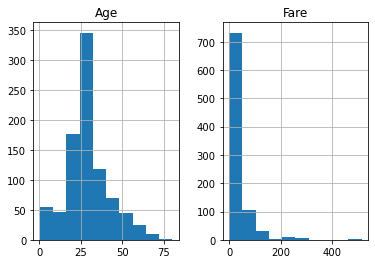

In [32]:
df[["Age","Fare"]].hist()

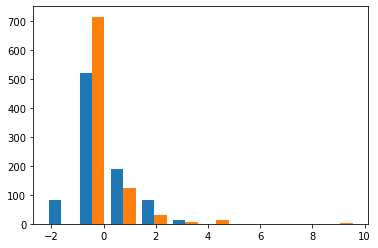

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
standard=standard_scaler.fit_transform(df[["Age","Fare"]])
plt.hist(standard)
plt.show()

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder


final_pieline=ColumnTransformer([
    ("Age",SimpleImputer(strategy='median'),["Age","Cabin","Ticket"]),
    ("Num",StandardScaler(),["Fare"]),
    ("Cat",OneHotEncoder(categories='auto'),["Name","Embarked","sub-Cabin","sub-Ticket"]),
    ],
    remainder='passthrough')

In [46]:
def transform(dataframe):
    copyd=dataframe.copy()
    copyd.pop("PassengerId")
    y=copyd.pop("Survived").astype("bool")
    copyd.Name=copyd[["Name"]].apply(lambda element: element.Name.split(",")[0],axis=1)
    copyd["sub-Ticket"] = copyd["Ticket"].apply(split_fnc)
    copyd["Ticket"]=copyd["Ticket"].apply(lambda x:x.split(" ")[-1] if x.split(" ")[-1].isnumeric() else np.nan)
    copyd["sub-Cabin"] = copyd["Cabin"].apply(split_cabin)
    copyd["Cabin"] = copyd["Cabin"].apply(count_cabin)
    copyd["Ticket"] = copyd["Ticket"].astype('float')
    copyd["Cabin"] = copyd["Cabin"].astype('float')
    for col in "Name","Embarked","Sex","sub-Cabin","sub-Ticket":
        copyd[col] = copyd[col].astype('category')
        copyd[col] = copyd[col].cat.codes.astype('category')
    X=final_pieline.fit_transform(copyd)
    return X,y

In [47]:
copy=df.copy()
copy["sub-Ticket"] = copy["Ticket"].apply(split_fnc)
copy["Ticket"]=copy["Ticket"].apply(lambda x:x.split(" ")[-1] if x.split(" ")[-1].isnumeric() else np.nan)
copy["Ticket"] = copy["Ticket"].astype('float')

In [51]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
X,y=transform(df)

In [53]:
y

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [55]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(classifier,X,y,cv=5)

In [56]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.8321917808219178

In [57]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.7105263157894737

In [58]:
n_estimators=[350,360,370,380,390]
max_features=["auto"]
min_samples_split=[2]
min_samples_leaf=[1]
bootstrap=[True]

In [60]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=classifier,param_grid={"n_estimators":n_estimators,
                                                      "max_features":max_features,
                                                      "min_samples_split":min_samples_split,
                                                      "min_samples_leaf":min_samples_leaf,
                                                      "bootstrap":bootstrap},cv=3)

In [59]:
rf_grid.fit(X,y)

In [61]:
rf_grid.best_params_

In [62]:
rf_class=RandomForestClassifier(bootstrap=True,max_features="auto",n_estimators=400)

In [63]:
y_pred_amel=cross_val_predict(rf_class,X,y,cv=5)

In [64]:
precision_score(y, y_pred_amel)

0.8450704225352113

In [65]:
recall_score(y, y_pred_amel)

0.7017543859649122